In [1]:
#import
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
df=pd.read_csv('Hybrid.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cate_name          68 non-null     object 
 1   Cate_HOMO          68 non-null     float64
 2   Cate_LUMO          68 non-null     float64
 3   Cate_ESP_O1        68 non-null     float64
 4   Cate_ESP_H1        68 non-null     float64
 5   Cate_ESP_O2        68 non-null     float64
 6   Cate_ESP_H2        68 non-null     float64
 7   Cate_BL_ArO1       68 non-null     float64
 8   Cate_BL_O1H1       68 non-null     float64
 9   Cate_BL_ArO2       68 non-null     float64
 10  Cate_BL_O2H2       68 non-null     float64
 11  Cate_total_dipole  68 non-null     float64
 12  Cate_RDKit_PC_0    68 non-null     float64
 13  Cate_RDKit_PC_1    68 non-null     float64
 14  Cate_RDKit_PC_2    68 non-null     float64
 15  Cate_RDKit_PC_3    68 non-null     float64
 16  Cate_RDKit_PC_4    68 non-nu

In [3]:
#Building descriptors
X = df.drop(columns=['Yield', 'Cate_name', 'P_name' ])
print('---Descriptors---')
print(X.head())

y = pd.DataFrame(df['Yield'],columns=['Yield'])
print('---Objective---')
print(y.head())

---Descriptors---
   Cate_HOMO  Cate_LUMO  Cate_ESP_O1  Cate_ESP_H1  Cate_ESP_O2  Cate_ESP_H2  \
0      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
1      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
2      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
3      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
4      -5.51       0.22    -0.542028     0.433177    -0.582447     0.440296   

   Cate_BL_ArO1  Cate_BL_O1H1  Cate_BL_ArO2  Cate_BL_O2H2  ...  P_HOMO  \
0         1.363         0.969         1.378         0.965  ...   -7.85   
1         1.363         0.969         1.378         0.965  ...   -8.16   
2         1.363         0.969         1.378         0.965  ...   -7.22   
3         1.363         0.969         1.378         0.965  ...   -7.85   
4         1.364         0.969         1.379         0.965  ...   -7.85   

   P_LUMO   P_ESP_P  P_ESP_=O   P_ESP_H  P_BL_P=O  P_BL_PH  P_

In [4]:
#storage 
data_r2_train =[]
data_RMSE_train = []
data_MAE_train = []
data_r2_test = []
data_RMSE_test = []
data_MAE_test = []
cum_coef = np.zeros((1,X.shape[1]))

#Lasso
for i in range(10):
    seed=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
    a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
    n_lambda = 1000
    alphas = np.logspace(-6, 0, n_lambda)
    model = LassoCV(cv=5, alphas=alphas)
    model.fit(a_X_train, y_train['Yield'])
    
    cum_coef += model.coef_
    
    y_pred1 = model.predict(a_X_train)
    y_pred2 = model.predict(a_X_test)
    
    #train
    r2_train = metrics.r2_score(y_train, y_pred1)
    RMSE_train = metrics.root_mean_squared_error(y_train, y_pred1)
    MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
    #test
    r2_test = metrics.r2_score(y_test, y_pred2)
    RMSE_test = metrics.root_mean_squared_error(y_test, y_pred2)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred2)
    
    data_r2_train.append(r2_train)
    data_RMSE_train.append(RMSE_train)
    data_MAE_train.append(MAE_train)
    data_r2_test.append(r2_test)
    data_RMSE_test.append(RMSE_test)
    data_MAE_test.append(MAE_test)
    
    # standard regression coefficiency
    standard_regression_coefficients = pd.DataFrame(model.coef_)  
    standard_regression_coefficients.index = X_train.columns  
    standard_regression_coefficients.columns = ['standard_regression_coefficients']
    
    print('----------------------')
    print('seed:', seed)
    print('R2_train:', r2_train)
    print('R2_test:', r2_test)
    print('----------------------')
    print(standard_regression_coefficients)
print('R2_train_means:', sum(data_r2_train)/10)
print('R2_test_means:', sum(data_r2_test)/10)

----------------------
seed: 0
R2_train: 0.8734158872937914
R2_test: 0.724673106191839
----------------------
                   standard_regression_coefficients
Cate_HOMO                                  0.000000
Cate_LUMO                                 -0.000000
Cate_ESP_O1                                0.000000
Cate_ESP_H1                               -2.272115
Cate_ESP_O2                               -0.000000
Cate_ESP_H2                                1.006810
Cate_BL_ArO1                               0.000000
Cate_BL_O1H1                              -0.000000
Cate_BL_ArO2                              -0.000000
Cate_BL_O2H2                              -0.000000
Cate_total_dipole                          0.000000
Cate_RDKit_PC_0                            0.730873
Cate_RDKit_PC_1                           -0.385978
Cate_RDKit_PC_2                            0.143021
Cate_RDKit_PC_3                            0.000000
Cate_RDKit_PC_4                           -0.000000
Cate_R

----------------------
seed: 6
R2_train: 0.8640047448628729
R2_test: 0.7631498647706572
----------------------
                   standard_regression_coefficients
Cate_HOMO                                  0.000000
Cate_LUMO                                 -0.000000
Cate_ESP_O1                                0.000000
Cate_ESP_H1                               -2.270951
Cate_ESP_O2                               -0.000000
Cate_ESP_H2                                0.000000
Cate_BL_ArO1                               0.000000
Cate_BL_O1H1                              -0.000000
Cate_BL_ArO2                               0.000000
Cate_BL_O2H2                              -0.661722
Cate_total_dipole                          0.000000
Cate_RDKit_PC_0                            1.169963
Cate_RDKit_PC_1                           -0.763781
Cate_RDKit_PC_2                            0.286745
Cate_RDKit_PC_3                           -0.219371
Cate_RDKit_PC_4                            0.000000
Cate_

In [5]:
data_r2_train_pd = pd.DataFrame(data= data_r2_train, columns=['r2_train'])
data_RMSE_train_pd = pd.DataFrame(data=data_RMSE_train, columns=['RMSE_train'])
data_MAE_train_pd = pd.DataFrame(data=data_MAE_train, columns=['MAE_train'])
data_r2_test_pd = pd.DataFrame(data=data_r2_test, columns=['r2_test'])
data_RMSE_test_pd = pd.DataFrame(data=data_RMSE_test, columns=['RMSE_test'])
data_MAE_test_pd = pd.DataFrame(data=data_MAE_test, columns=['MAE_test'])

data_all = pd.concat([data_r2_train_pd, data_RMSE_train_pd, data_MAE_train_pd, data_r2_test_pd, 
                      data_RMSE_test_pd, data_MAE_test_pd],
                     axis=1, join='inner')

data_all.loc['mean'] = data_all.mean()
data_all.loc['std'] = data_all.std(ddof=0)
print(data_all)

data_all.to_csv('../../score/Hybrid/Lasso_score.csv')

      r2_train  RMSE_train  MAE_train   r2_test  RMSE_test   MAE_test
0     0.873416    9.660545   5.922782  0.724673  18.976666  12.649968
1     0.825589   12.558739   8.292956  0.836359  12.591398   9.296259
2     0.852720   11.672555   7.994957  0.801248  13.863827   8.689622
3     0.846536   11.964017   7.733805  0.823186  13.026749   9.349986
4     0.855911   11.145337   7.351569  0.787624  15.027443   9.465553
5     0.842428   11.295669   6.872742  0.745723  17.585588  10.182042
6     0.864005   10.564455   6.537561  0.763150  16.883120  10.776881
7     0.865041   11.361671   7.610416  0.755671  14.882415  10.331134
8     0.847839   11.572371   6.831415  0.776084  14.875548   9.498258
9     0.830017   13.125086   9.195505  0.849490  10.298438   8.672812
mean  0.850350   11.492045   7.434371  0.786321  14.801119   9.891252
std   0.013754    0.876825   0.855394  0.037060   2.311443   1.069582


In [6]:
seed=9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
n_lambda = 1000
alphas = np.logspace(-6, 0, n_lambda)
model = LassoCV(cv=5, alphas=alphas)
model.fit(a_X_train, y_train['Yield'])
    
y_pred1 = model.predict(a_X_train)
y_pred2 = model.predict(a_X_test)

#train
r2_train = metrics.r2_score(y_train, y_pred1)
RMSE_train = metrics.mean_squared_error(y_train, y_pred1)
MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
    
#test
r2_test = metrics.r2_score(y_test, y_pred2)
RMSE_test = metrics.mean_squared_error(y_test, y_pred2)
MAE_test = metrics.mean_absolute_error(y_test, y_pred2)

print(r2_train)
print(r2_test)

0.8300172216977069
0.8494902708111461


In [7]:
# standard regression coefficiency
select = standard_regression_coefficients.abs()
select=select.sort_values('standard_regression_coefficients',ascending=False)
selection=[]
for a in select[0:7].index:
    selection.append(a)
chart=standard_regression_coefficients.loc[selection]
chart=chart.sort_values('standard_regression_coefficients',ascending=False)
chart

,standard_regression_coefficients
Cate_RDKit_PC_0,4.914879
Cate_RDKit_PC_6,-0.204574
Cate_RDKit_PC_3,-0.662911
P_RDKit_PC_0,-1.403597
Cate_RDKit_PC_1,-2.241749
Cate_ESP_H1,-4.341123
P_ESP_H,-25.485234


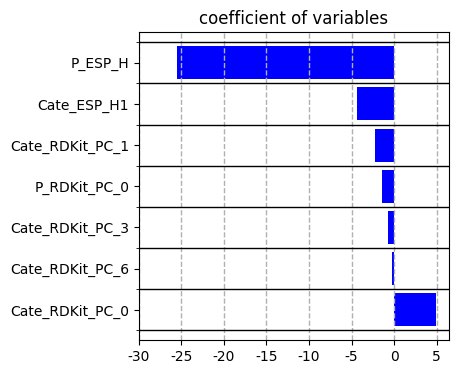

In [8]:
x_pos = np.arange(len(chart))

fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.barh(x_pos, chart['standard_regression_coefficients'], color='b')
ax1.set_title('coefficient of variables')
ax1.set_yticks(x_pos)
ax1.set_yticks(np.arange(-1,len(chart.index))+0.5, minor=True)
ax1.set_yticklabels(chart.index)
ax1.set_xticks(np.arange(-30,10,5))
ax1.set_xticklabels(np.arange(-30,10,5))
ax1.grid(which='minor',axis='y',color='black',linestyle='-', linewidth=1)
ax1.grid(which='major',axis='x',linestyle='--', linewidth=1)
plt.show()